In [1]:
import numpy as np
import pandas as pd
import GPy
import time
import sys
import os
import pdb
import matplotlib.pyplot as plt

from context import aep
from context import load_data
from context import delete_blocks
from context import start_df
from context import save_df
from context import metrics
from thesis_work.plots import GP_figures
from thesis_work.plots import SGP_figures
from thesis_work.plots import DGP_figures

from baseline_models import full_GP_reg
from baseline_models import sparse_GP_reg
from aep_config import cont_optimization
from aep_config import aep_DGP_reg

default_dict = {'M': 30, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':100,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': []}
os.getcwd()
%matplotlib notebook

# Load data: normalise, delete blocks

Dataset size:  5000  Test size:  2000.0
Training:  1250


<IPython.core.display.Javascript object>


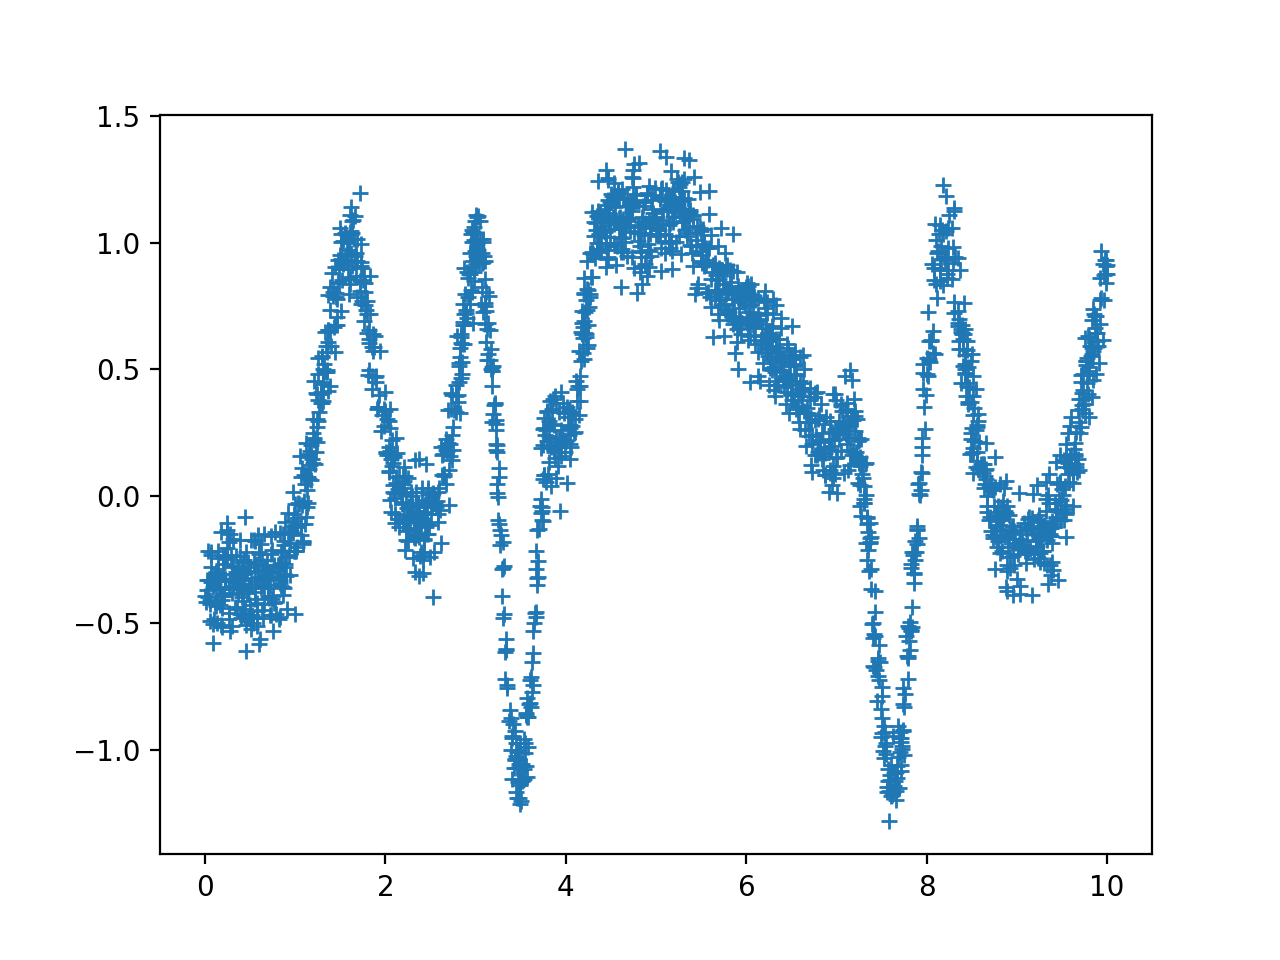

In [2]:
path = 'data/dgp_samples/old/sample_3.txt'
X_train, y_train, X_test, y_test = load_data(path, N_train=1250, test=0.4, norm_out=False)
# X_test, y_test = delete_blocks(X_test, y_test,
#                                intervals=[2,4,8,9])
plt.figure()
plt.plot(X_test, y_test, '+')
plt.show()

# Baseline models

create full GP model and optimize ...
Test MSE =0.011, NLL =-0.837


<IPython.core.display.Javascript object>


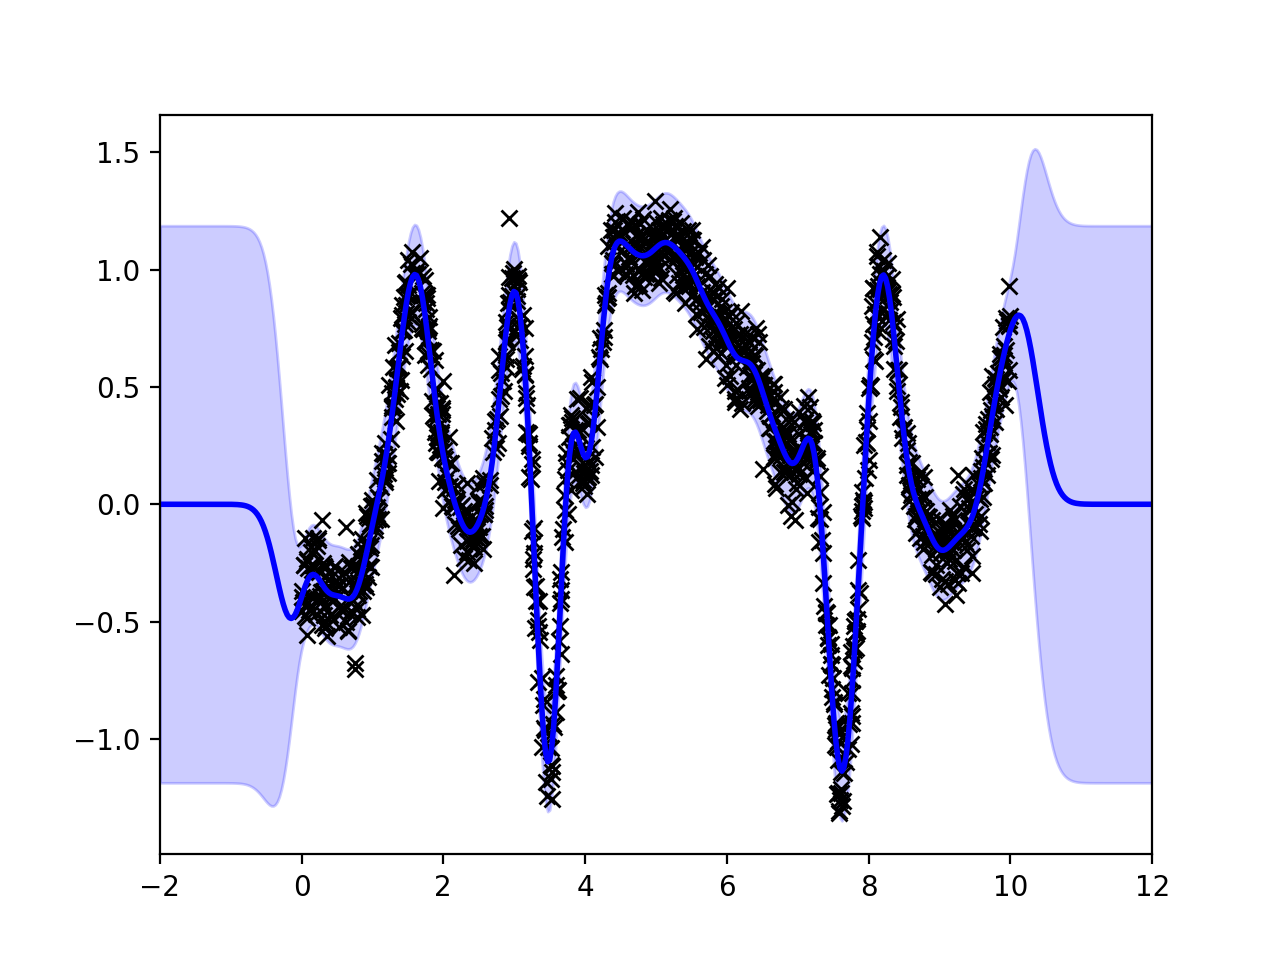

In [3]:
model_gp, df = full_GP_reg(X_train, y_train, X_test, y_test)
fig = GP_figures(model_gp).plot()

In [5]:
# fig.savefig('../fig.png')
# save_df('../', df, name='scores')

## Sparse GP

create SGP model and optimize ...
Test MSE =0.011, NLL =-0.840


<IPython.core.display.Javascript object>


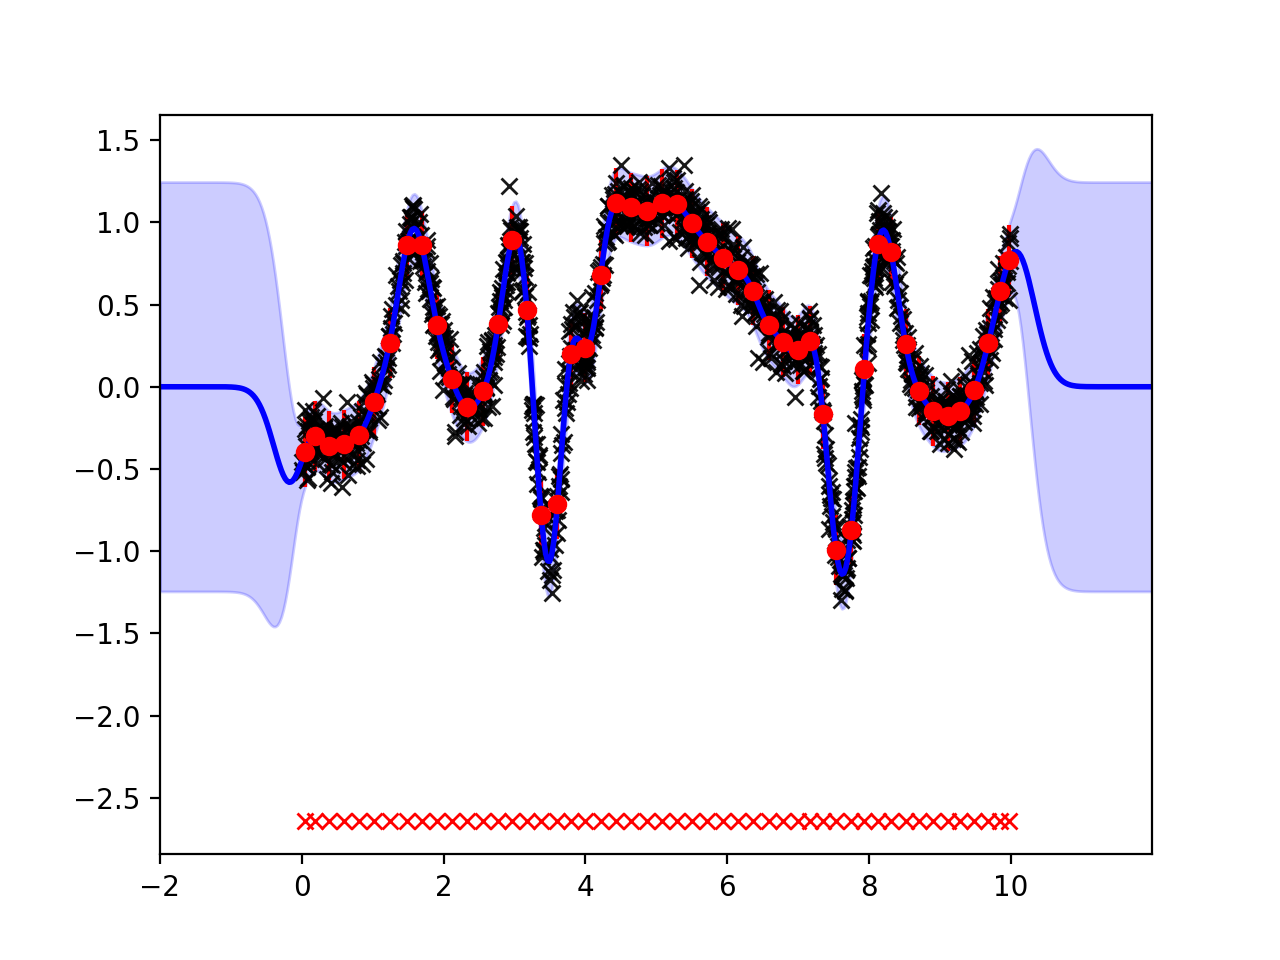

In [6]:
model_sgp, df = sparse_GP_reg(X_train, y_train, X_test, y_test, M=50)
fig = SGP_figures(model_sgp).plot()

# AEP Deep GPs

Create DGP model and optimize ...
Optimise with fixed:  []
Default initialisation
iter 0 	 obj 9.758
iter 50 	 obj 2.955
iter 100 	 obj 1.750
iter 150 	 obj 1.100
iter 200 	 obj 0.414
iter 250 	 obj -0.049
iter 300 	 obj -0.181
iter 350 	 obj -0.225
iter 400 	 obj -0.235
iter 450 	 obj -0.261
iter 500 	 obj -0.270
iter 550 	 obj -0.311
iter 600 	 obj -0.293
iter 650 	 obj -0.431
iter 700 	 obj -0.363
iter 750 	 obj -0.412
iter 800 	 obj -0.416
iter 850 	 obj -0.433
iter 900 	 obj -0.454
iter 950 	 obj -0.445
Test MSE= 0.014, NLL= -0.658, SN= 0.118


<IPython.core.display.Javascript object>


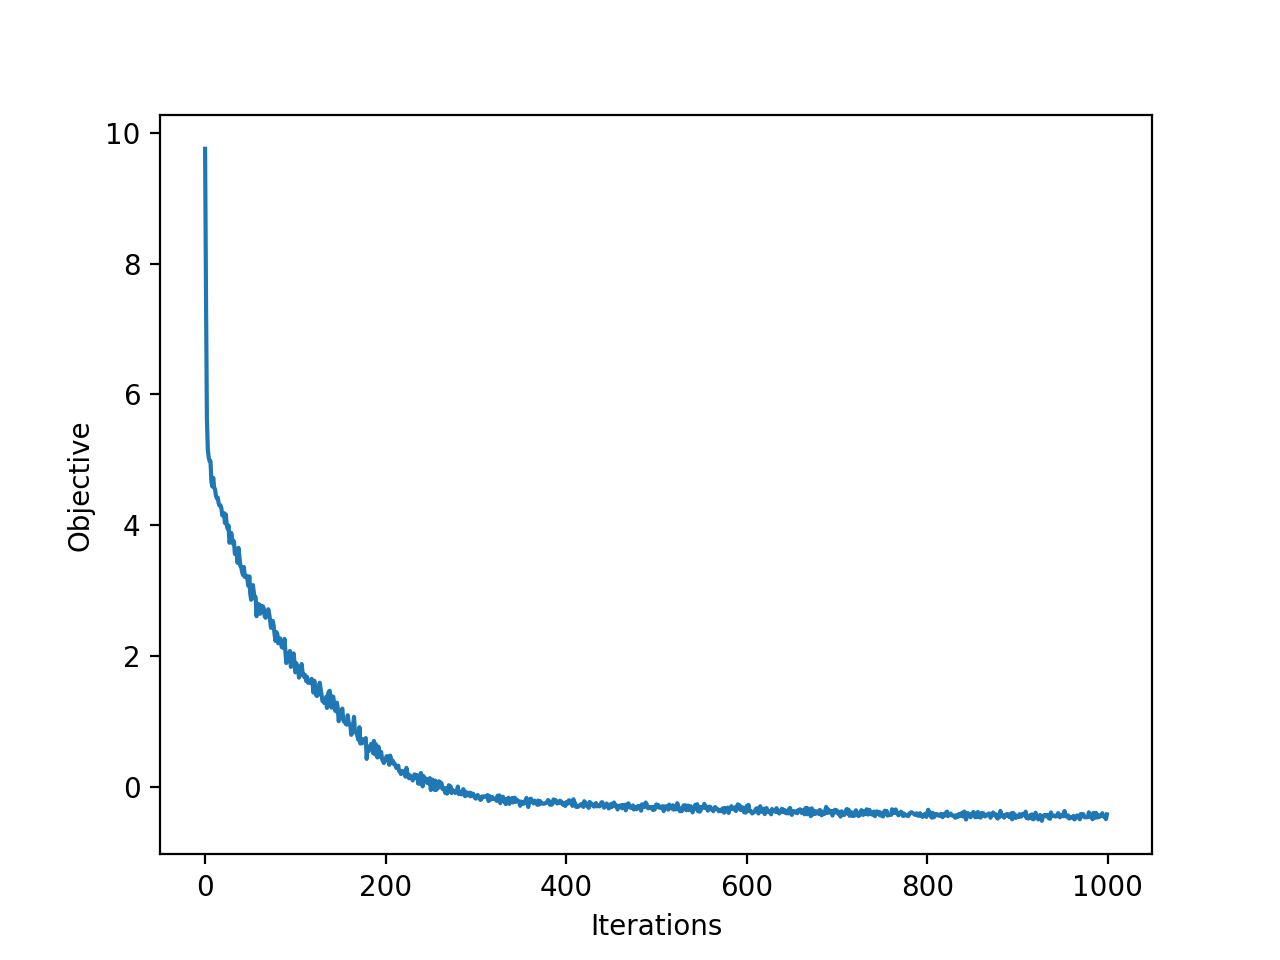

In [7]:
N_train = X_train.shape[0]
config_dict = {'M': 50, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':1000,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': [], 'init_type': True}

model, df, costs = aep_DGP_reg(X_train, y_train, X_test, y_test, 
				conf_dict= config_dict,
				return_cost=True)
fig0 = DGP_figures(model,conf_dict=config_dict).plot_cost(costs)

In [8]:
config_dict['optimizer'] = 'adam'
model, df = cont_optimization(model, X_test, y_test, conf_dict=config_dict,
                              new_max_it=1000, return_cost=False)

iter 0 	 obj -0.453
iter 50 	 obj -0.537
iter 100 	 obj -0.517
iter 150 	 obj -0.480
iter 200 	 obj -0.508
iter 250 	 obj -0.489
iter 300 	 obj -0.466
iter 350 	 obj -0.492
iter 400 	 obj -0.542
iter 450 	 obj -0.502
iter 500 	 obj -0.523
iter 550 	 obj -0.470
iter 600 	 obj -0.504
iter 650 	 obj -0.547
iter 700 	 obj -0.544
iter 750 	 obj -0.517
iter 800 	 obj -0.477
iter 850 	 obj -0.542
iter 900 	 obj -0.512
iter 950 	 obj -0.576
Test MSE= 0.013, NLL= -0.722, SN= 0.112


In [9]:
print dir(DGP_figures)

['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'h_out', 'h_out2', 'in_h', 'in_out', 'plot', 'plot_cost', 'plot_h_out', 'plot_hidden', 'plot_in_h', 'plot_init', 'plot_sample']


### Fitting plots

<IPython.core.display.Javascript object>


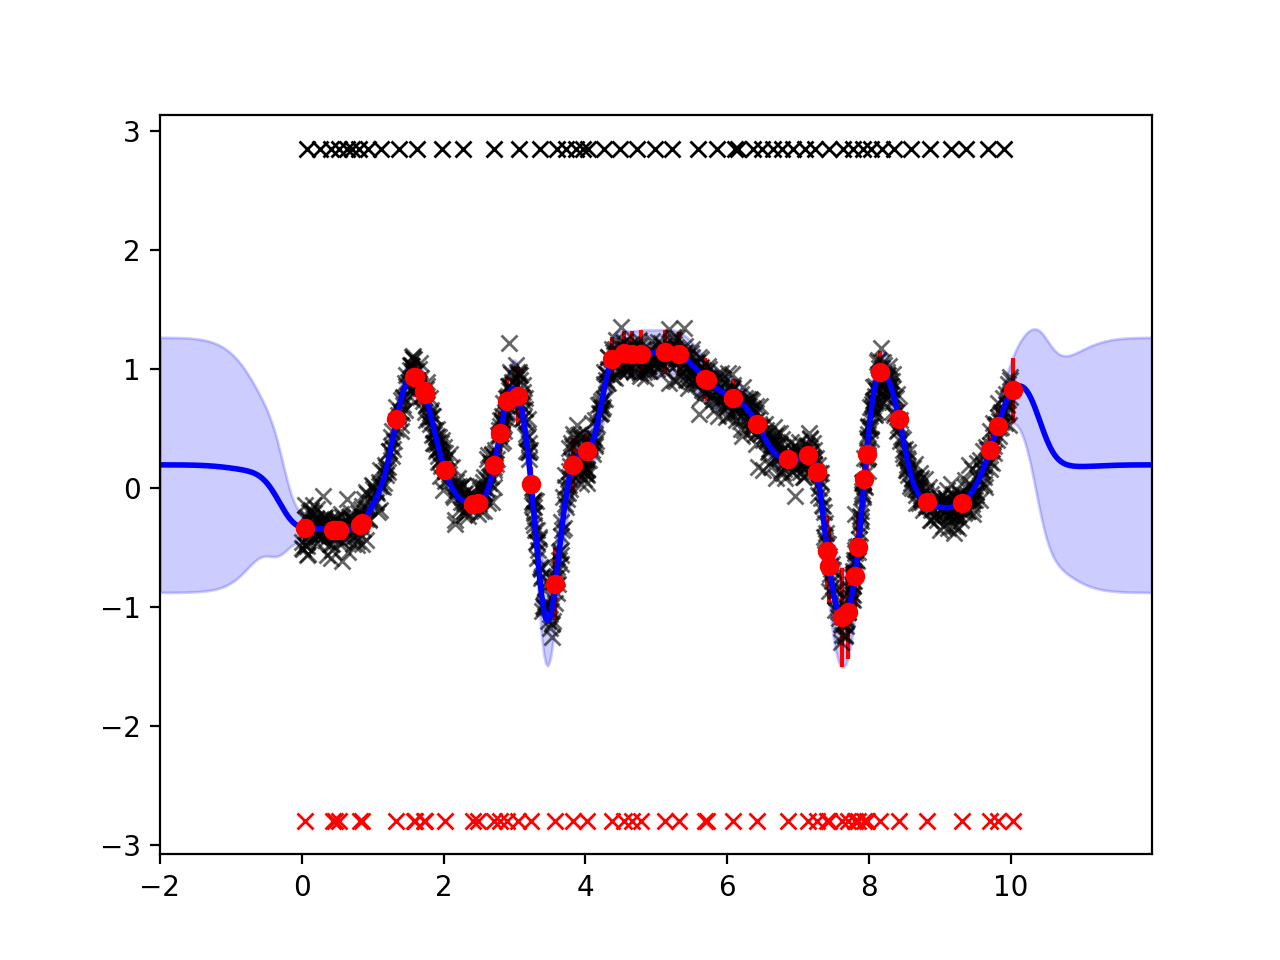

Default initialisation


<IPython.core.display.Javascript object>


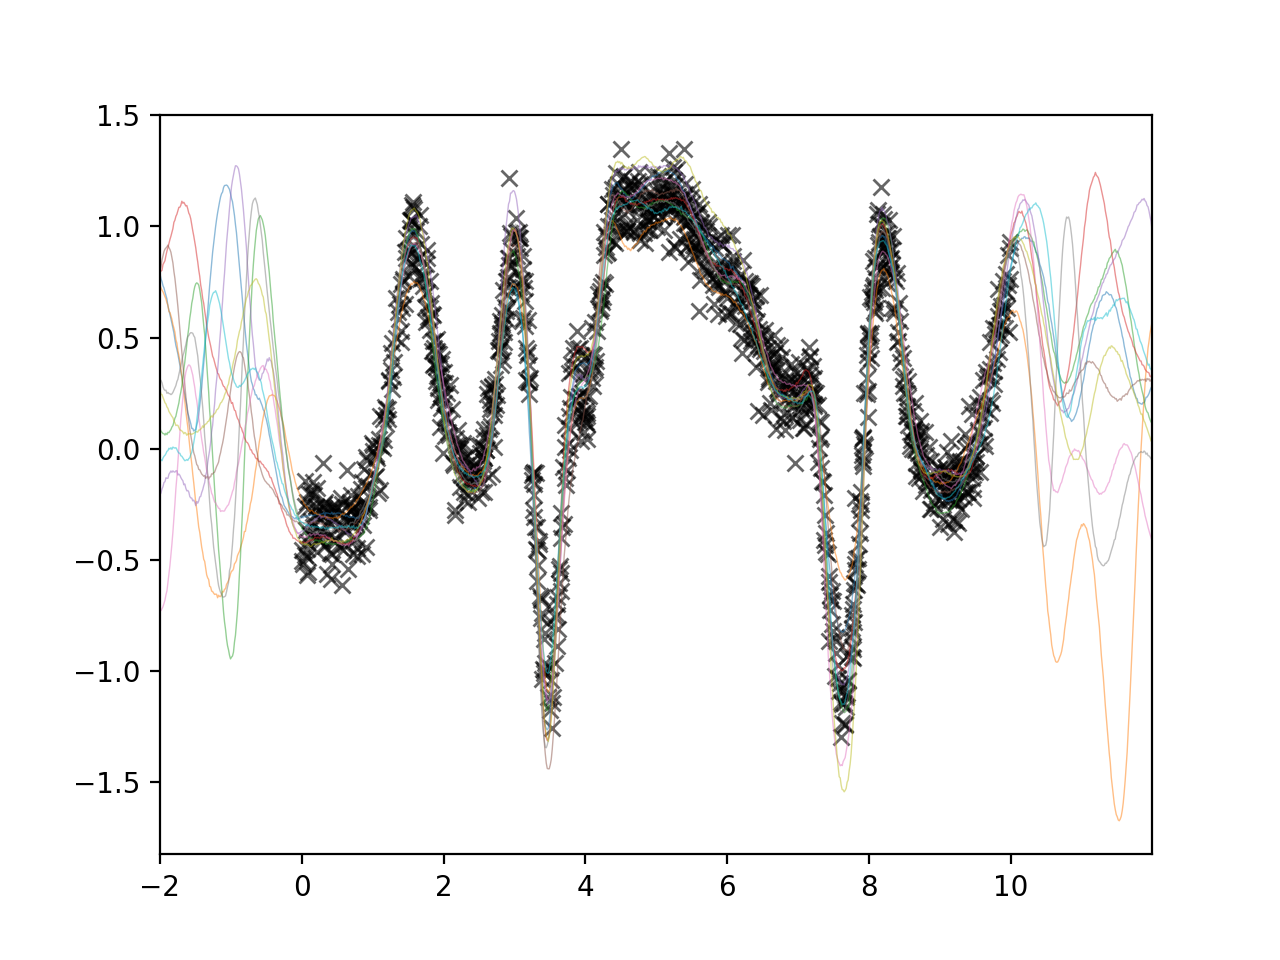

In [9]:
fig1 = DGP_figures(model, config_dict).plot()
fig2 = DGP_figures(model, config_dict).plot_sample()

### Hidden Layer

Default initialisation


<IPython.core.display.Javascript object>


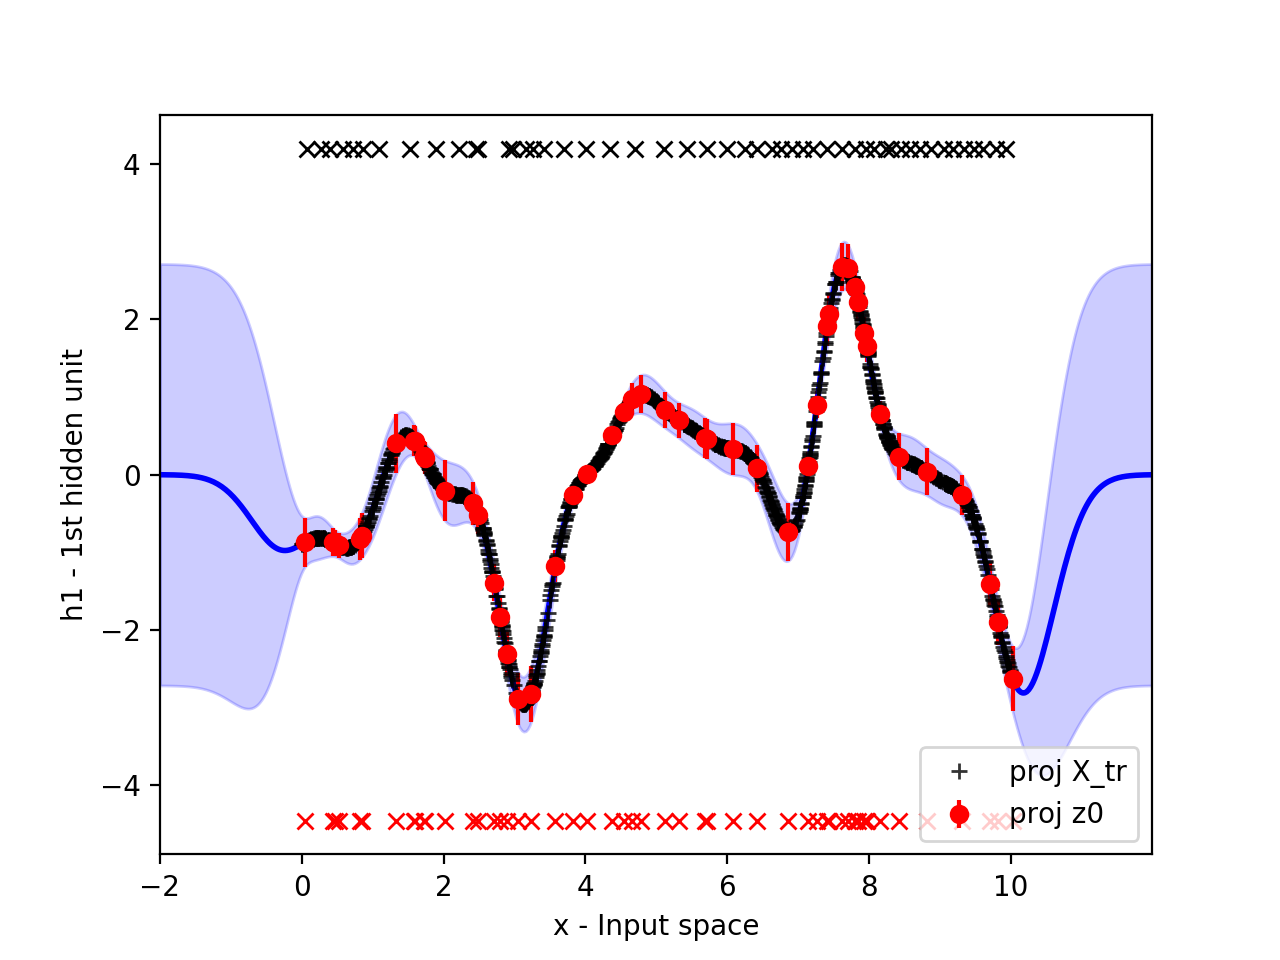

<IPython.core.display.Javascript object>


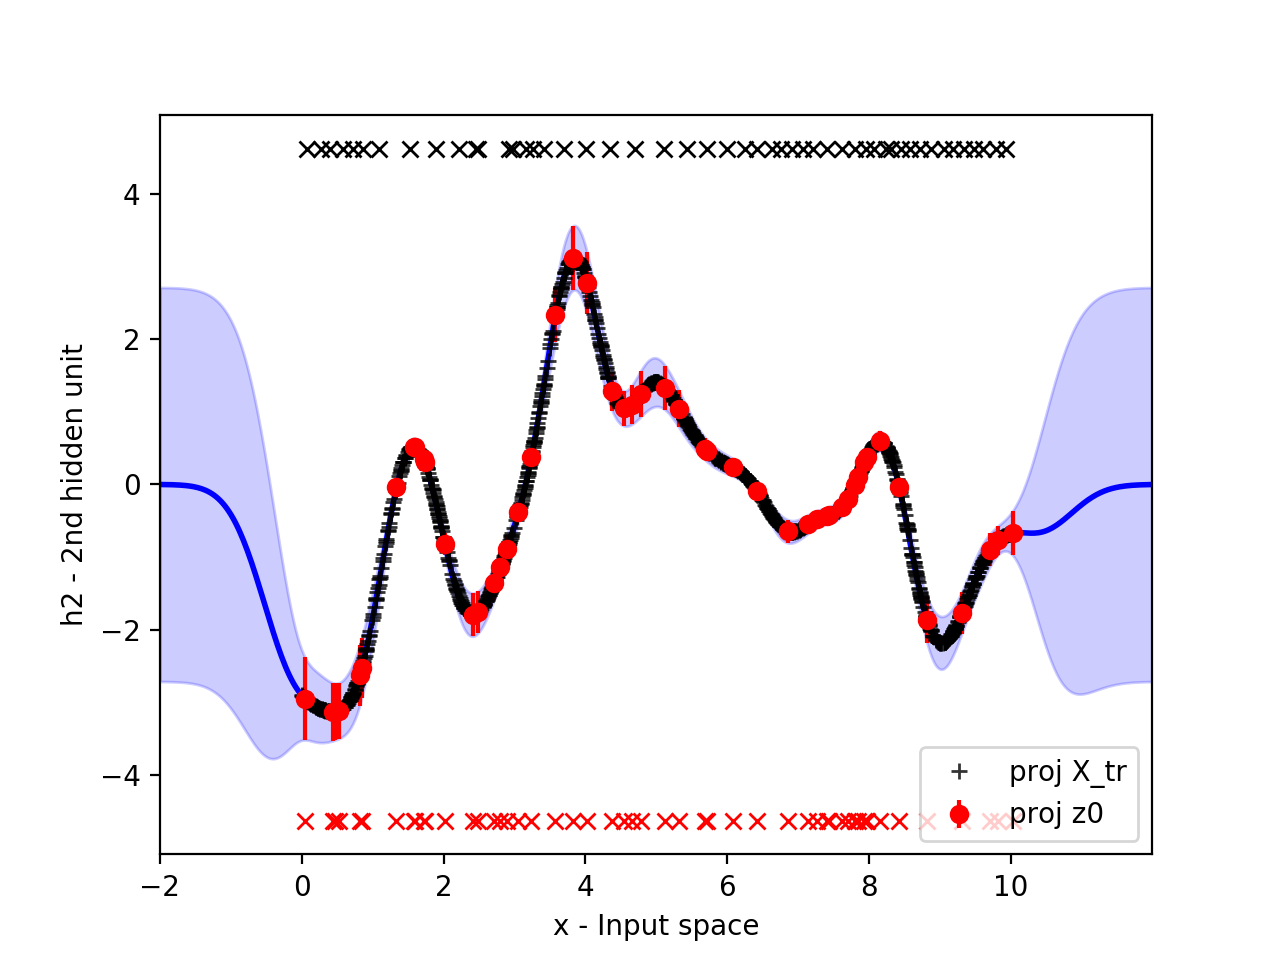

In [10]:
fig3 = DGP_figures(model, conf_dict=config_dict).plot_in_h()

Default initialisation


<IPython.core.display.Javascript object>


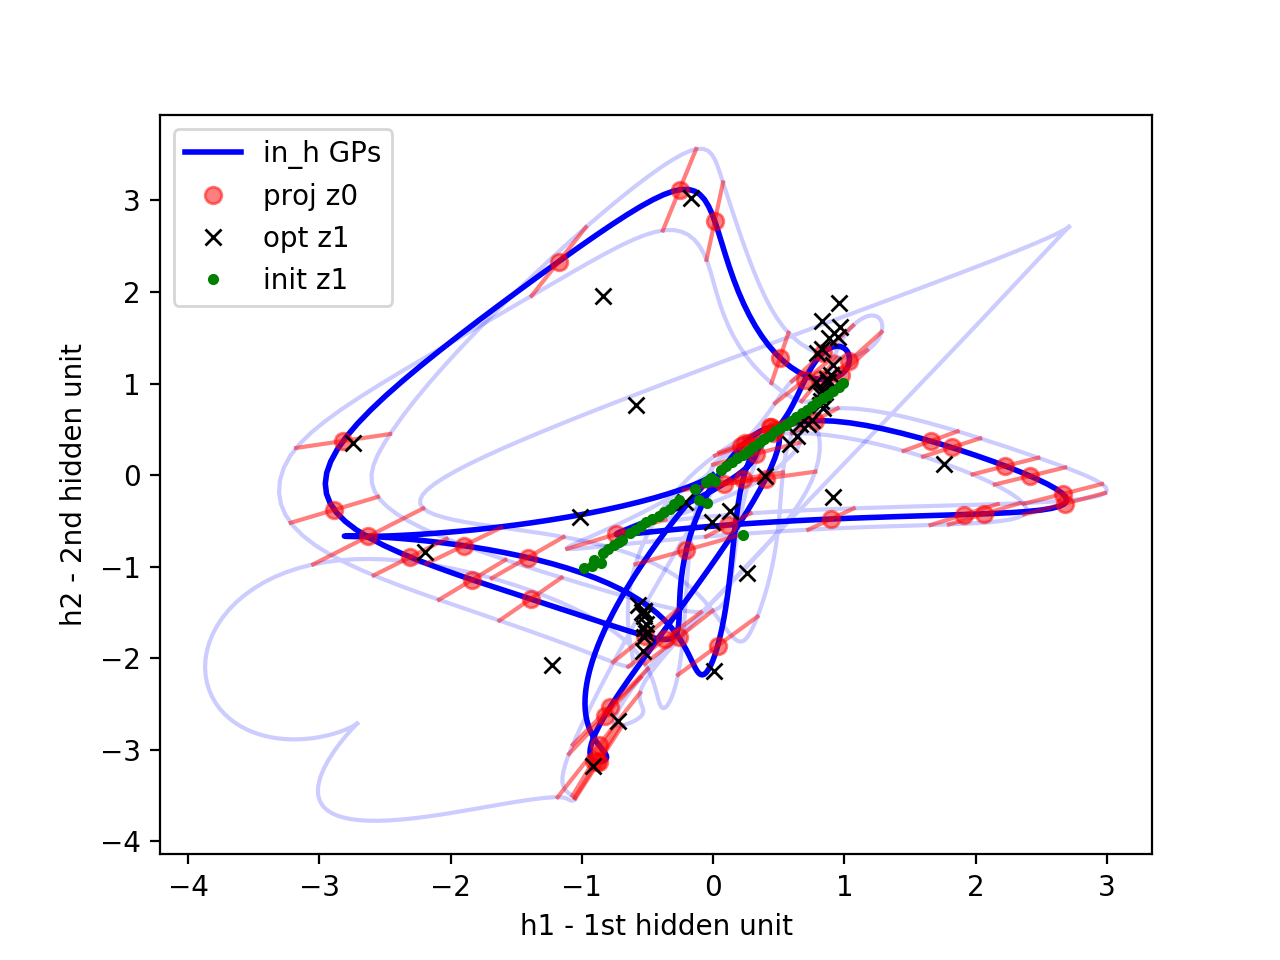

In [11]:
fig4 = DGP_figures(model, conf_dict=config_dict).plot_hidden()

Default initialisation


<IPython.core.display.Javascript object>


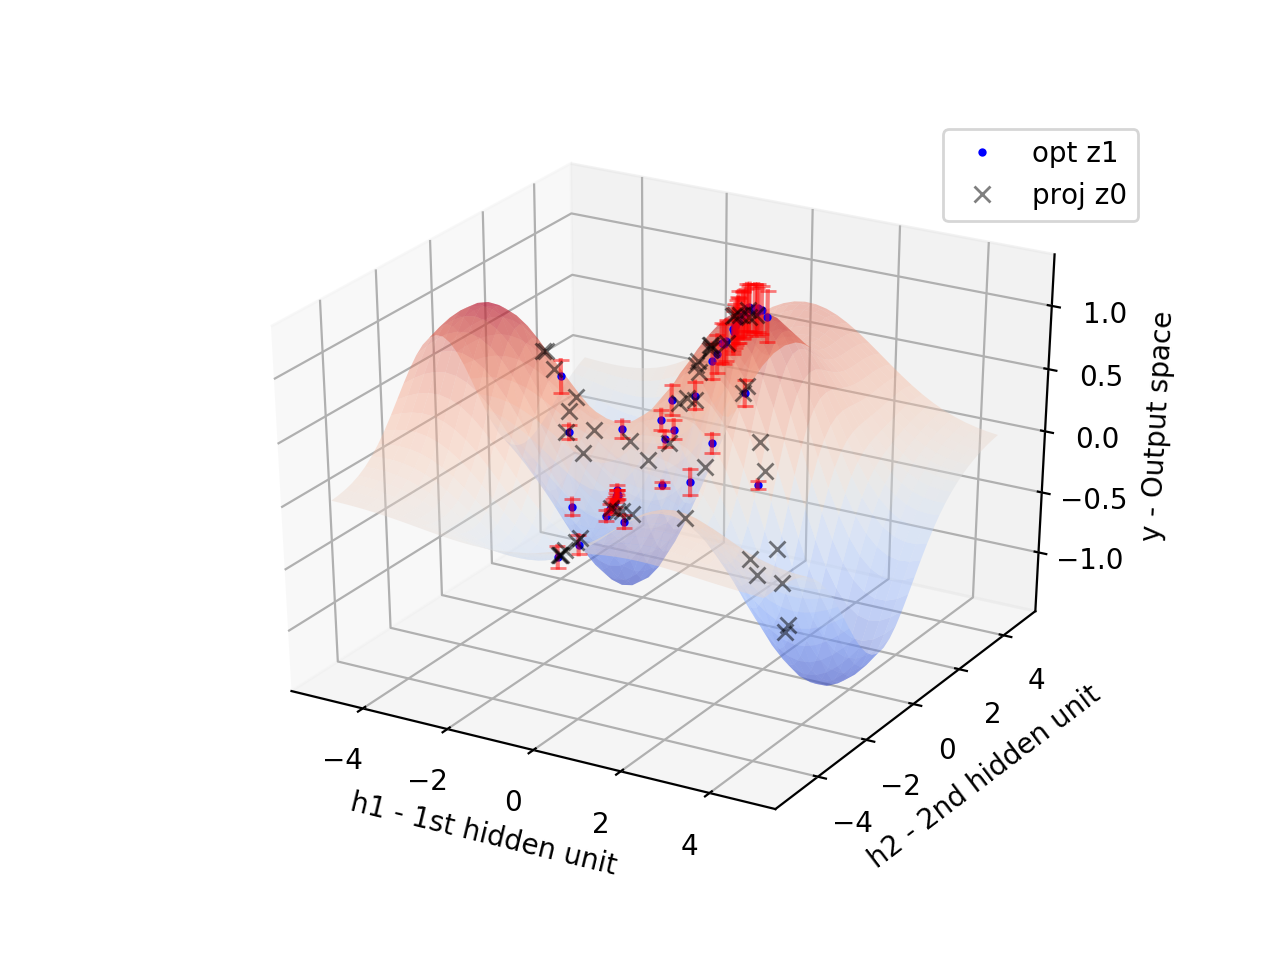

In [12]:
fig5 = DGP_figures(model, conf_dict=config_dict).plot_h_out()

### Initialisations

<IPython.core.display.Javascript object>


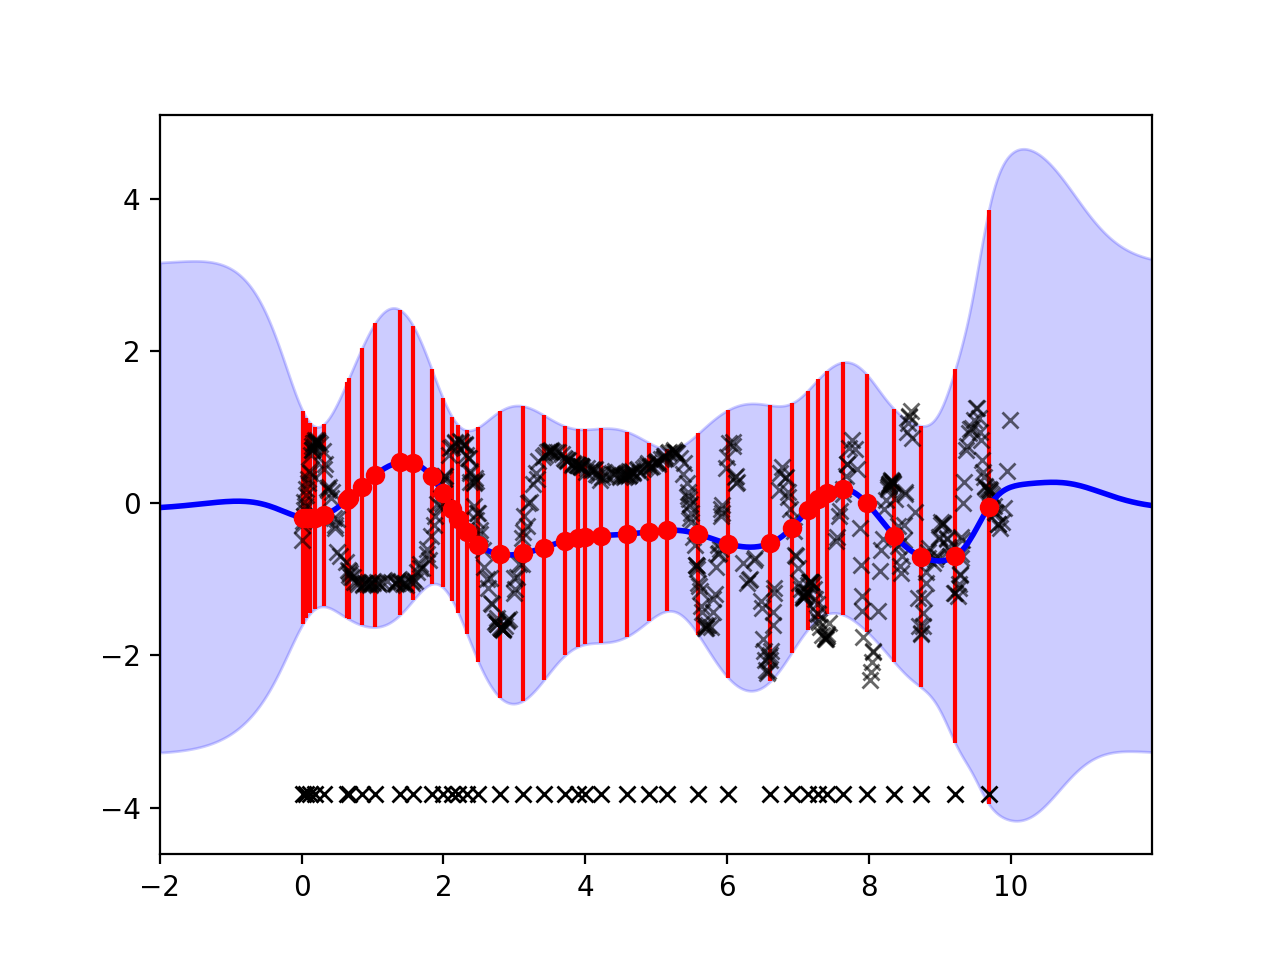

In [55]:
fig6 = DGP_figures(model, conf_dict=config_dict).plot_init()